In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , Input , BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Physical GPUs:", physical_devices)


Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
# Paths to the dataset
train_dir = 'Dataset/Train/'
valid_dir = 'Dataset/Validation/'

In [14]:
# Parameters
img_height = 128
img_width = 128



In [15]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


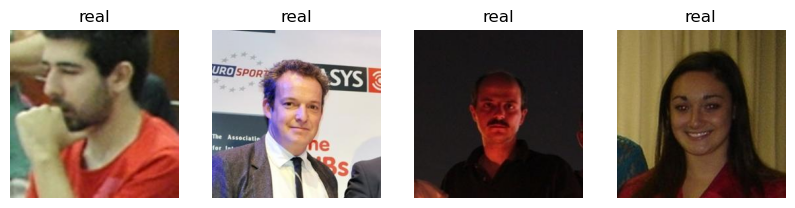

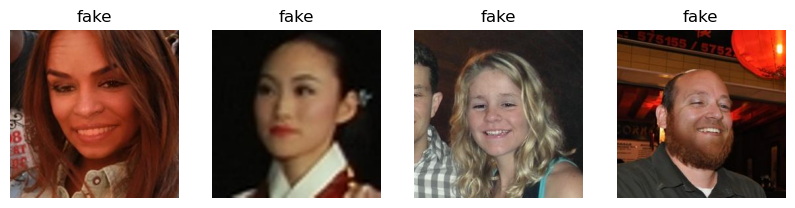

In [48]:
# Define paths to your image folders
folder_paths = ['Dataset/Train/Real/', 'Dataset/Train/Fake/']


def display_images(folder_path, label, num_images=4):
    image_files = os.listdir(folder_path)
    
    num_displayed = 0
    plt.figure(figsize=(10, 5))
    for img_file in image_files:
        if num_displayed >= num_images:
            break
        img_path = os.path.join(folder_path, img_file)
        img = mpimg.imread(img_path)
        
        # Display image
        plt.subplot(1, num_images, num_displayed + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label)
        
        num_displayed += 1


i = 1
for folder_path in folder_paths:
    if(i==1):
        label = 'real' 
    else: 
        label = 'fake'
    i += 1
    display_images(folder_path , label)

### CNN Model

In [17]:
# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the layers
model.add(Flatten())



model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax'))  





/Users/ojas/miniforge3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 2,784,578 (10.62 MB)

 Trainable params: 2,782,850 (10.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [19]:
# Early stopping
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping_cb]
)


Epoch 1/20


2024-06-27 16:00:20.438959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/ojas/miniforge3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 350s 79ms/step - accuracy: 0.7651 - loss: 0.5086 - val_accuracy: 0.8270 - val_loss: 0.3808
Epoch 2/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 345s 79ms/step - accuracy: 0.9312 - loss: 0.1735 - val_accuracy: 0.8769 - val_loss: 0.2708
Epoch 3/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 299s 68ms/step - accuracy: 0.9420 - loss: 0.1482 - val_accuracy: 0.9376 - val_loss: 0.1446
Epoch 4/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 351s 80ms/step - accuracy: 0.9495 - loss: 0.1276 - val_accuracy: 0.9399 - val_loss: 0.1525
Epoch 5/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 361s 82ms/step - accuracy: 0.9522 - loss: 0.1228 - val_accuracy: 0.8989 - val_loss: 0.2331
Epoch 6/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 363s 83ms/step - accuracy: 0.9591 - loss: 0.1057 - val_accuracy: 0.9524 - val_loss: 0.1221
Epoch 7/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 309s 71ms/step - accuracy: 0.9631 - loss: 0.0980 - val_accuracy: 0.9483 - val_loss: 0.1222
Epoch 8/20
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 312s 71ms/step - accuracy: 0.9639 - lo

In [20]:
# Save the model
model.save('model.keras')

### The model achieves 98% accuracy on the training dataset and 97% accuracy on the validation dataset.

### Graphs

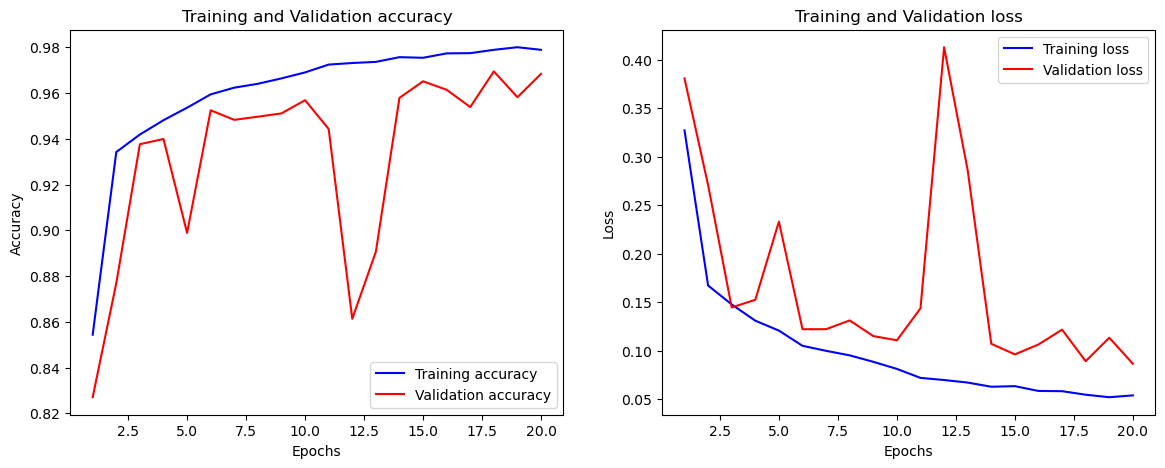

In [25]:
# Plotting function
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


plot_history(history)

### The training dataset displays consistent behavior, whereas the validation dataset shows more variability and occasional inconsistencies.

### Predictions

In [31]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'Dataset/Test/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
)

Found 10905 images belonging to 2 classes.


In [32]:
# Make predictions using the model
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

341/341 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [35]:
# Get true labels from the test generator
true_labels = test_generator.classes

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

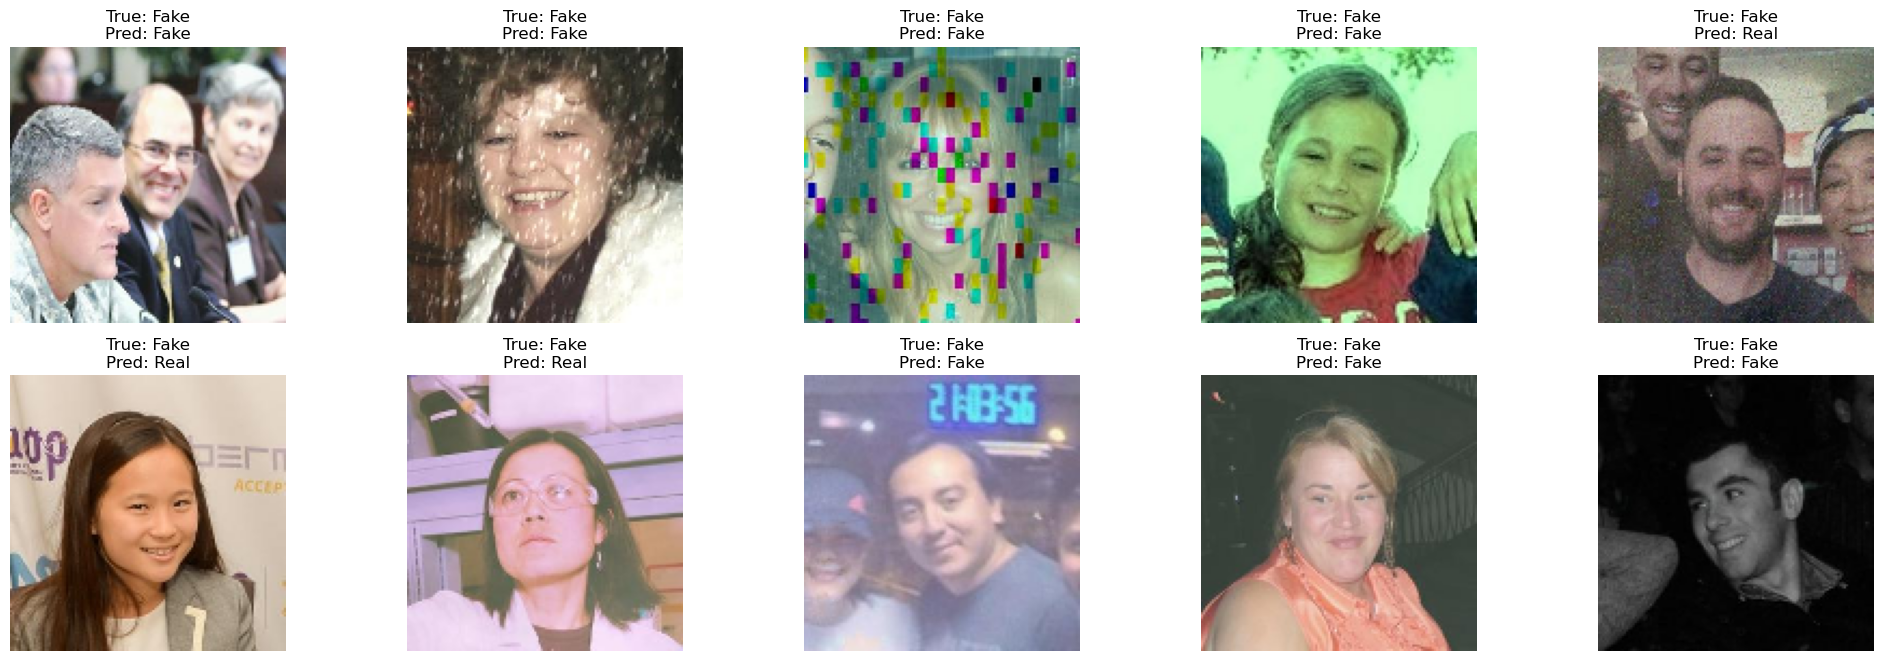

In [51]:
plt.figure(figsize=(20, 10))
for i in range(min(len(true_labels), 10)): 
    plt.subplot(3, 5, i + 1)
    img = test_generator[i][0][0]  
    plt.imshow(img.squeeze())  
    plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()